<div style="background-color:#E50914; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h1 align="center" style="color:#ffffff;"><b>Netflix Movie Recommendation System 🎬</b></h1>
</div>

<div style="background-color:#000000; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <img src="https://media.tenor.com/NerN41mjgV0AAAAC/netflix-intro.gif" alt="Animated GIF">
</div>

#**Objective**
**The primary goal of this project is to analyze and visualize key insights from the Netflix dataset. The specific objectives are:**

**1.Temporal Analysis:**

**Display the annual distribution of movies to understand the trend in releases over the years.**

**2.Content Type Distribution:**

**Illustrate the distribution of content types (Movies/TV Shows) to gain insights into the platform's content landscape.**

**3.Geographical Analysis:**

**Identify and showcase the top countries contributing the highest number of movies to the Netflix catalog.**

**4.Country-wise Movie Distribution:**

**Present a choropleth map to visualize the number of movies released by each country, providing a global perspective.**

**5.Movies Rating Distribution:**

**Analyze and visualize the distribution of movie ratings to understand the audience preferences.**

 **6.Movies Duration Analysis:**

**Explore the distribution of movie durations to identify common trends in content length.**

**7.Text Analysis - Titles:**

**Create a word cloud to highlight the most common words in Netflix titles, offering insights into popular themes or genres.**

**8.Text Analysis - Descriptions:**

**Generate a word cloud for movie and TV show descriptions, providing an overview of frequently used terms.**

**9.Data Cleaning and Transformation:**

**Implement data cleaning techniques, such as handling missing values and transforming text data for analysis.**

**10.Machine Learning - Content Recommendations:**

**Develop a content recommendation system based on cosine similarity using TF-IDF representation.
By achieving these objectives, the project aims to offer comprehensive insights into Netflix's content distribution, audience preferences, and global content landscape.**

<div style="background-color:#E50914; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>IMPORT DEPENDENCIES</b></h2>
</div>

In [1]:
!pip3 install -q numpy pandas matplotlib plotly wordcloud scikit-learn

In [2]:
#import Libraies
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.sparse import save_npz
import warnings
warnings.filterwarnings('ignore')

In [5]:
## Read the CSV file from the specified path, assuming it's a ZIP-compressed file
netflix_data = pd.read_csv("/content/netflix_data.csv.zip")
# The result is stored in the variable netflix_data
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<div style="background-color:#E50914; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>DATA PRE-PROCESSING AND EDA</b></h2>
</div>

In [ ]:
# Display concise summary information about the DataFrame using the info() method
# This includes the data types, non-null counts, and memory usage
netflix_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Use the isnull() method to check for missing values in each column of the DataFrame
# The sum() method is then applied to count the number of True values (missing values) for each column
missing_values = netflix_data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
# Use the fillna() method to replace missing values in the DataFrame with an empty string ('')
# The inplace parameter is set to False, meaning the operation does not modify the original DataFrame
filled_data = netflix_data.fillna('', inplace=False)

# Display or use the filled_data DataFrame where missing values are replaced with an empty string
print(filled_data)


     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water                    
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans                    
4         s5  TV Show           Kota Factory                    
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb                    
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                        United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [ ]:
# Use the describe() method to generate descriptive statistics of the DataFrame
# The include='all' parameter ensures that both numeric and object data types are included
# The T attribute is then used to transpose the result for better readability
statistics_summary = netflix_data.describe(include='all').T

# Display the transposed summary statistics for each column
print(statistics_summary)


               count unique  \
show_id         8807   8807   
type            8807      2   
title           8807   8807   
director        6173   4528   
cast            7982   7692   
country         7976    748   
date_added      8797   1767   
release_year  8807.0    NaN   
rating          8803     17   
duration        8804    220   
listed_in       8807    514   
description     8807   8775   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  6131   
title                                      Dick Johnson Is Dead     1   
director                                          Rajiv Chilaka    19   
cast                                         David Attenborough    19   
country                                           United States  2818   
date_added                                      January 1, 2020   109   
release_year

In [ ]:
# Count the number of movies released each year and sort the result by year
movie_counts = netflix_data['release_year'].value_counts().sort_index()

# Create a bar chart using plotly graph_objects
fig = go.Figure(data=go.Bar(x=movie_counts.index, y=movie_counts.values))

# Update the layout of the figure for better aesthetics
fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',   # Set the background color of the plot
    paper_bgcolor='rgb(17, 17, 17)',  # Set the background color of the entire figure
    font_color='white',               # Set the font color to white
    title='Number of Movies Released Each Year',  # Set the title of the plot
    xaxis=dict(title='Year'),         # Set the title for the x-axis
    yaxis=dict(title='Number of Movies')  # Set the title for the y-axis
)

In [ ]:
# Count the distribution of content types ('Movie' or 'TV Show')
movie_type_counts = netflix_data['type'].value_counts()

# Create a pie chart using plotly graph_objects
fig = go.Figure(data=go.Pie(labels=movie_type_counts.index, values=movie_type_counts.values))

# Update the layout of the figure for better aesthetics
fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',   # Set the background color of the plot
    paper_bgcolor='rgb(17, 17, 17)',  # Set the background color of the entire figure
    font_color='white',               # Set the font color to white
    title='Distribution of Content Types',  # Set the title of the pie chart
)

# Update the color of the sectors in the pie chart
fig.update_traces(marker=dict(colors=['red']))

# Display the figure
fig.show()

In [ ]:
# Count the number of movies from the top 10 countries
top_countries = netflix_data['country'].value_counts().head(10)

# Create a treemap using plotly express
fig = px.treemap(names=top_countries.index, parents=["" for _ in top_countries.index], values=top_countries.values)

# Update the layout of the figure for better aesthetics
fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',   # Set the background color of the plot
    paper_bgcolor='rgb(17, 17, 17)',  # Set the background color of the entire figure
    font_color='white',               # Set the font color to white
    title='Top Countries with Highest Number of Movies',  # Set the title of the treemap
)

# Display the figure
fig.show()

In [ ]:
# Count the number of movies from each country
country_movie_counts = netflix_data['country'].value_counts()

# Create a DataFrame with country names and their corresponding movie counts
data = pd.DataFrame({'Country': country_movie_counts.index, 'Movie Count': country_movie_counts.values})

# Create a choropleth map using plotly express
fig = px.choropleth(data_frame=data,
                    locations='Country',      # Specify the column with country names
                    locationmode='country names',  # Set the location mode to recognize country names
                    color='Movie Count',      # Specify the column to use for coloring
                    title='Number of Movies Released By Country',  # Set the title of the choropleth map
                    color_continuous_scale='Reds',  # Set the color scale
                    range_color=(0, data['Movie Count'].max()),  # Set the color scale range
                    labels={'Movie Count': 'Number of Movies'}  # Set the label for the color scale
                    )

# Update the layout of the figure for better aesthetics
fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',   # Set the background color of the plot
    paper_bgcolor='rgb(17, 17, 17)',  # Set the background color of the entire figure
    font_color='white'                # Set the font color to white
)

# Display the figure
fig.show()

In [ ]:
# Get the unique ratings and their corresponding counts
ratings = list(netflix_data['rating'].value_counts().index)
rating_counts = list(netflix_data['rating'].value_counts().values)

# Create a bar chart using plotly graph_objects
fig = go.Figure(data=[go.Bar(
    x=ratings,
    y=rating_counts,
    marker_color='#E50914'  # Set the color of the bars
)])

# Update the layout of the figure for better aesthetics
fig.update_layout(
    title='Movie Ratings Distribution',  # Set the title of the bar chart
    xaxis_title='Rating',  # Set the title for the x-axis
    yaxis_title='Count',   # Set the title for the y-axis
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Set the background color of the plot
    paper_bgcolor='rgba(0, 0, 0, 0.7)',  # Set the background color of the entire figure
    font=dict(color='white')  # Set the font color to white
)

# Display the figure
fig.show()

In [ ]:
# Find the index of the maximum count in rating_counts
max_count_index = rating_counts.index(max(rating_counts))

# Get the rating with the highest count using the index
rating_with_highest_count = ratings[max_count_index]

# Print the result
print("Rating with the highest count:", rating_with_highest_count)


Rating with the highest count: TV-MA


In [ ]:
# Get the unique durations and their corresponding counts
durations = list(netflix_data['duration'].value_counts().index)
duration_counts = list(netflix_data['duration'].value_counts().values)

# Create a bar chart using plotly graph_objects
fig = go.Figure(data=[go.Bar(
    x=durations,
    y=duration_counts,
    marker_color='#E50914'  # Set the color of the bars
)])

# Update the layout of the figure for better aesthetics
fig.update_layout(
    title='Movie Durations Distribution',  # Set the title of the bar chart
    xaxis_title='Duration',  # Set the title for the x-axis
    yaxis_title='Count',     # Set the title for the y-axis
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Set the background color of the plot
    paper_bgcolor='rgba(0, 0, 0, 0.7)',  # Set the background color of the entire figure
    font=dict(color='white')  # Set the font color to white
)

# Display the figure
fig.show()

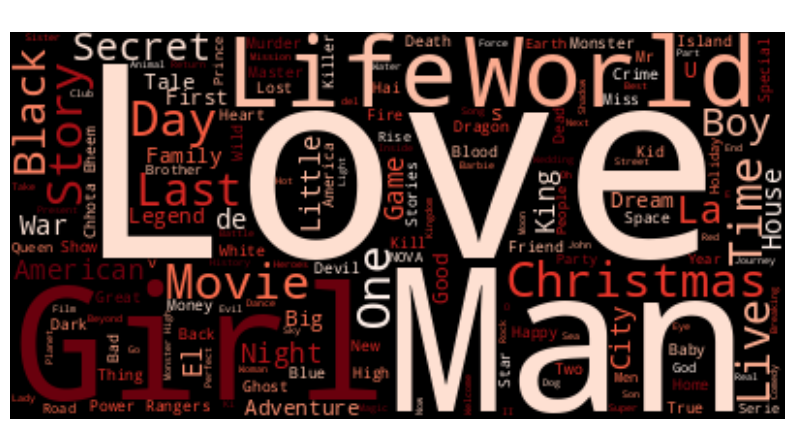

In [ ]:
# Get the titles from the 'title' column
titles = netflix_data['title'].values

# Concatenate all titles into a single text string
text = ' '.join(titles)

# Generate a word cloud using the WordCloud class
wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

# Create a plot to display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels and ticks
plt.title('Most Common Words in Netflix Titles', color='white')  # Set the title of the plot
plt.show()

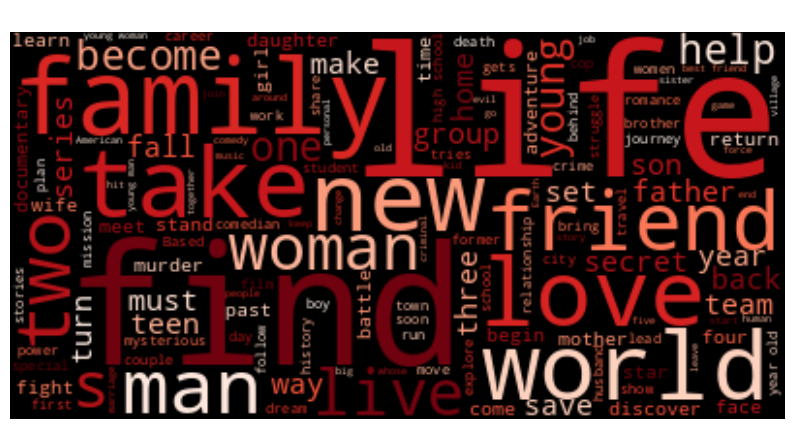

In [ ]:
# Get the descriptions from the 'description' column
descriptions = netflix_data['description'].values

# Concatenate all descriptions into a single text string
text = ' '.join(descriptions)

# Generate a word cloud using the WordCloud class
wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

# Create a plot to display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels and ticks
plt.title('Most Common Words in Netflix Descriptions', color='white')  # Set the title of the plot
plt.show()

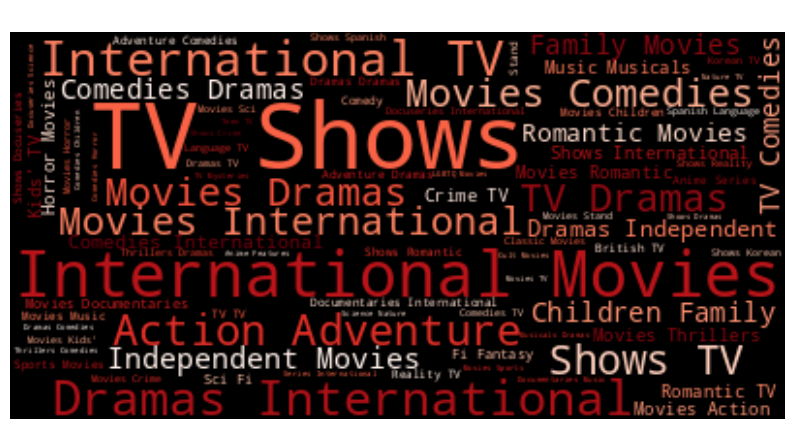

In [ ]:
# Get the 'listed_in' values from the Netflix dataset
listed_in_values = netflix_data['listed_in'].values

# Concatenate all 'listed_in' values into a single text string
text = ' '.join(listed_in_values)

# Generate a word cloud using the WordCloud class
wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

# Create a plot to display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels and ticks
plt.title('Most Common Words in Netflix Listed Categories', color='white')  # Set the title of the plot
plt.show()

In [ ]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


<div style="background-color:#E50914; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>FEATURE ENGINEERING</b></h2>
</div>

In [ ]:
# Create a new DataFrame 'new_data' with selected columns from 'netflix_data'
new_data = netflix_data[['title', 'type', 'director', 'cast', 'rating', 'listed_in', 'description']]

# Set the 'title' column as the index of the DataFrame
new_data.set_index('title', inplace=True)


In [ ]:
new_data.head()

,type,director,cast,rating,listed_in,description
title,,,,,,
Dick Johnson Is Dead,Movie,Kirsten Johnson,NaN,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
Blood & Water,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
Ganglands,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
Jailbirds New Orleans,TV Show,NaN,NaN,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
Kota Factory,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
import string

class TextCleaner:
    def separate_text(self, texts):
        """
        Separate a comma-separated string into unique lowercase text elements.

        Parameters:
        - texts (str): Comma-separated string of text elements.

        Returns:
        - str: A string with unique, lowercase text elements separated by spaces.
        """
        unique_texts = set()
        for text in texts.split(','):
            unique_texts.add(text.strip().lower())
        return ' '.join(unique_texts)

    def remove_space(self, texts):
        """
        Remove spaces from a string and convert it to lowercase.

        Parameters:
        - texts (str): Input string.

        Returns:
        - str: The input string with spaces removed and converted to lowercase.
        """
        return texts.replace(' ', '').lower()

    def remove_punc(self, texts):
        """
        Remove punctuation from a string and convert it to lowercase.

        Parameters:
        - texts (str): Input string.

        Returns:
        - str: The input string with punctuation removed and converted to lowercase.
        """
        texts = texts.lower()
        texts = texts.translate(str.maketrans('', '', string.punctuation))
        return ' '.join(texts.split())

    def clean_text(self, texts):
        """
        Perform a sequence of text cleaning operations.

        Parameters:
        - texts (str): Input string.

        Returns:
        - str: The cleaned text after applying various cleaning operations.
        """
        texts = self.separate_text(texts)
        texts = self.remove_space(texts)
        texts = self.remove_punc(texts)
        return texts


In [ ]:
cleaner = TextCleaner()

In [ ]:
new_data['director'] = new_data['director'].apply(lambda x: cleaner.separate_text(x) if pd.notnull(x) else x)


In [ ]:
# Apply text cleaning methods to specific columns in the new_data DataFrame

# Clean 'type' column by removing spaces
new_data['type'] = new_data['type'].apply(cleaner.remove_space)

# Clean 'director' column by separating and lowercasing text elements
new_data['director'] = new_data['director'].astype('str')
new_data['director'] = new_data['director'].apply(cleaner.separate_text)

# Clean 'cast' column by separating and lowercasing text elements
new_data['cast'] = new_data['cast'].astype('str')
new_data['cast'] = new_data['cast'].apply(cleaner.separate_text)

# Clean 'rating' column by removing spaces (if it's a string)
new_data['rating'] = new_data['rating'].apply(lambda x: cleaner.remove_space(x) if isinstance(x, str) else x)

# Clean 'listed_in' column by separating and lowercasing text elements
new_data['listed_in'] = new_data['listed_in'].apply(cleaner.separate_text)

# Clean 'description' column by removing punctuation
new_data['description'] = new_data['description'].apply(cleaner.remove_punc)


In [ ]:
new_data.head()

,type,director,cast,rating,listed_in,description
title,,,,,,
Dick Johnson Is Dead,movie,kirsten johnson,NaN,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
Blood & Water,tvshow,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
Ganglands,tvshow,julien leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
Jailbirds New Orleans,tvshow,NaN,NaN,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
Kota Factory,tvshow,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Create a new 'BoW' column by joining non-null values in each row with a space
new_data['BoW'] = new_data.apply(lambda row: ' '.join(row.dropna().values), axis=1)

# Drop all columns except for the 'BoW' column
new_data.drop(new_data.columns[:-1], axis=1, inplace=True)


In [ ]:
new_data.head()

,BoW
title,
Dick Johnson Is Dead,movie kirsten johnson nan pg-13 documentaries ...
Blood & Water,tvshow nan ryle de morny shamilla miller getmo...
Ganglands,tvshow julien leclercq noureddine farihi sami ...
Jailbirds New Orleans,tvshow nan nan tv-ma docuseries reality tv feu...
Kota Factory,tvshow nan arun kumar revathi pillai jitendra ...


In [ ]:
# Create an instance of TfidfVectorizer
tfid = TfidfVectorizer()

# Transform the 'BoW' column into a TF-IDF matrix
tfid_matrix = tfid.fit_transform(new_data['BoW'])

In [ ]:
# Calculate the cosine similarity between rows (documents) in the TF-IDF matrix
cosine_sim = cosine_similarity(tfid_matrix, tfid_matrix)

# Display the resulting cosine similarity matrix
cosine_sim

array([[1.        , 0.00710485, 0.02007143, ..., 0.01063224, 0.02105649,
        0.03042719],
       [0.00710485, 1.        , 0.01713649, ..., 0.00103066, 0.        ,
        0.00481456],
       [0.02007143, 0.01713649, 1.        , ..., 0.00560911, 0.01042642,
        0.0333502 ],
       ...,
       [0.01063224, 0.00103066, 0.00560911, ..., 1.        , 0.05649084,
        0.00600011],
       [0.02105649, 0.        , 0.01042642, ..., 0.05649084, 1.        ,
        0.01046521],
       [0.03042719, 0.00481456, 0.0333502 , ..., 0.00600011, 0.01046521,
        1.        ]])

In [ ]:
cosine_sim

array([[1.        , 0.00710485, 0.02007143, ..., 0.01063224, 0.02105649,
        0.03042719],
       [0.00710485, 1.        , 0.01713649, ..., 0.00103066, 0.        ,
        0.00481456],
       [0.02007143, 0.01713649, 1.        , ..., 0.00560911, 0.01042642,
        0.0333502 ],
       ...,
       [0.01063224, 0.00103066, 0.00560911, ..., 1.        , 0.05649084,
        0.00600011],
       [0.02105649, 0.        , 0.01042642, ..., 0.05649084, 1.        ,
        0.01046521],
       [0.03042719, 0.00481456, 0.0333502 , ..., 0.00600011, 0.01046521,
        1.        ]])

In [ ]:
# Save the TF-IDF matrix to a file
np.save('tfidf_matrix.npy', tfid_matrix)

# Save the cosine similarity matrix to a file
np.save('cosine_sim_matrix.npy', cosine_sim)

In [ ]:
# Save the TF-IDF vectorizer to a file using pickle
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfid, f)

In [ ]:
final_data = netflix_data[['title', 'type']]

In [ ]:
final_data.head()

,title,type
0,Dick Johnson Is Dead,Movie
1,Blood & Water,TV Show
2,Ganglands,TV Show
3,Jailbirds New Orleans,TV Show
4,Kota Factory,TV Show


In [ ]:
final_data.to_csv('movie_data.csv',index=False)

<div style="background-color:#E50914; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>_ Movie Recommendation System 🎬 (FLIX-HUB) _</b></h2>
</div>

In [ ]:
import re
class FlixHub:
    def __init__(self, df, cosine_sim):
        self.df = df
        self.cosine_sim = cosine_sim

    def recommendation(self, title, total_result=5, threshold=0.5):
        idx = self.find_id(title)
        self.df['similarity'] = self.cosine_sim[idx]
        sort_df = self.df.sort_values(by='similarity', ascending=False)[1:total_result+1]

        movies = sort_df['title'][sort_df['type'] == 'Movie']
        tv_shows = sort_df['title'][sort_df['type'] == 'TV Show']

        similar_movies = []
        similar_tv_shows = []

        for i, movie in enumerate(movies):
            similar_movies.append('{}. {}'.format(i+1, movie))

        for i, tv_show in enumerate(tv_shows):
            similar_tv_shows.append('{}. {}'.format(i+1, tv_show))

        return similar_movies, similar_tv_shows

    def find_id(self, name):
        for index, string in enumerate(self.df['title']):
            if re.search(name, string):
                return index
        return -1

In [ ]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Blood & Water', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Shirkers
2. Frank and Cindy
3. Adam: His Song Continues
4. Walk Away from Love

Similar TV_show(s) list:
1. Diamond City
2. Kings of Jo'Burg
3. Lion Pride
4. Forget Me Not
5. Horrid Henry
6. Lugar de Mulher


In [ ]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Chappie', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. District 9
2. Real Steel
3. The Last Days of American Crime
4. 2036 Origin Unknown
5. Singularity
6. AlphaGo
7. Hardcore Henry
8. A Monster Calls
9. Equals

Similar TV_show(s) list:
1. Taken


#Conclusion
1.Most number of movies are released in year 2018(1147).

2.The Type of content which with  highest number of Distribution is movies.

3.United states among top countries with highest number of movies.

4.Highest Number of movies Released by a country named United States.

5.TV-MA have highest rating count.

6.1 Season,1973 have highest Duration Count.

7.Most Common Words in Netflix Titles are Love, Man , House , King ,One  etc.

8.Most Common Words in Netflix Descriptions are World , Man , Must , Murder , turn , Stories etc.

9.Most Common Words in Netflix Listed Categories are Independent Movies , Shows TV , Romantic Movies , Comedies Dramas , Crime TV , Horror Movies , Scifi etc.